In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("dpl302m-wpdue").project("cosmetic-project")
version = project.version(1)
dataset = version.download("yolov8")

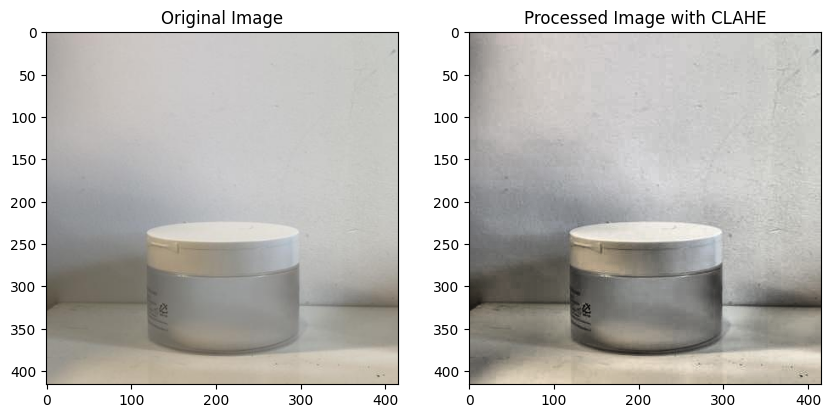

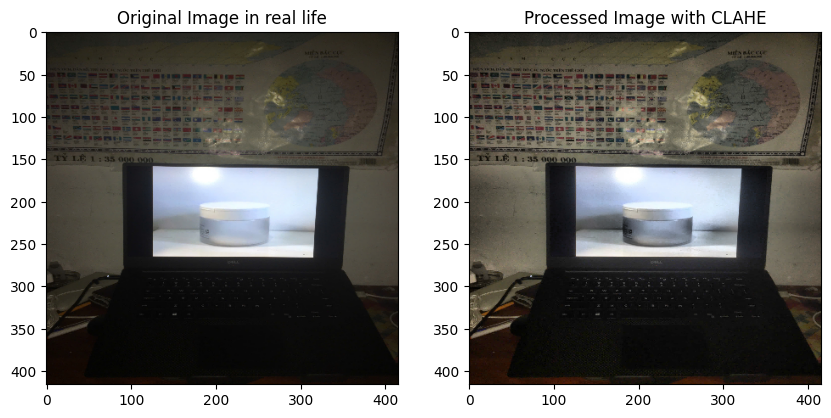

In [4]:
import cv2
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt

def preprocess_frame(frame):
    """
    Applies adaptive histogram equalization to the input frame to enhance contrast
    without converting it to grayscale.
    Parameters:
        frame (numpy array): The input image/frame (can be color or grayscale).
        
    Returns:
        numpy array: The processed image with enhanced contrast.
    """
    frame_eq = exposure.equalize_adapthist(frame)
    
    frame_eq = (frame_eq * 255).astype(np.uint8)
    
    return frame_eq

image = cv2.imread(r"D:\Ky 4\Classification_Cosmetics\cosmetic-project-4\valid\images\0236_jpg.rf.67ac2cc84a012cb3d1f630e52ff2978b.jpg")
image = cv2.resize(image, (416, 416))
preprocessed_image = preprocess_frame(image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(preprocessed_image, cv2.COLOR_BGR2RGB))
plt.title("Processed Image with CLAHE")

plt.show()

image = cv2.imread(r"C:\Users\5530\Desktop\1.jpg")
image = cv2.resize(image, (416, 416))

preprocessed_image = preprocess_frame(image)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image in real life")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(preprocessed_image, cv2.COLOR_BGR2RGB))
plt.title("Processed Image with CLAHE")
plt.show()

# Preprocessing image in Yolov8 format folder

In [23]:
import os
import cv2
import numpy as np
from skimage import exposure
import albumentations as A
from tqdm import tqdm

In [ ]:
def preprocess_frame(frame):
    frame_eq = exposure.equalize_adapthist(frame)
    frame_eq = (frame_eq * 255).astype(np.uint8)
    return frame_eq

def preprocess_images_in_folder(folder_path):
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg')):
                img_path = os.path.join(root, file)
                
                img = cv2.imread(img_path)
                
                if img is not None:
                    processed_img = preprocess_frame(img)
                    
                    # Save the processed image back to the same location (or a different folder)
                    cv2.imwrite(img_path, processed_img)
                    print(f"Processed and saved: {img_path}")
                else:
                    print(f"Failed to read: {img_path}")

def main(root_dir):
    subfolders = ['train', 'test', 'valid']
    
    # Loop through each folder and apply preprocessing
    for subfolder in subfolders:
        subfolder_path = os.path.join(root_dir, subfolder)
        
        if os.path.exists(subfolder_path):
            print(f"Processing images in folder: {subfolder_path}")
            preprocess_images_in_folder(subfolder_path)
        else:
            print(f"Folder {subfolder_path} does not exist.")

root_directory = "custom_yolov8_mannual"
main(root_directory)


Processing images in folder: custom_yolov8_mannual\train
Processed and saved: custom_yolov8_mannual\train\images\0101_jpg.rf.5a5af2e6e86abfb296ebfd18eb0d7991.jpg
Processed and saved: custom_yolov8_mannual\train\images\0102_jpg.rf.f5975221f46335b63a1859e8069fee58.jpg
Processed and saved: custom_yolov8_mannual\train\images\0103_jpg.rf.48c2724fe76c928d383a65d5ef3771c1.jpg
Processed and saved: custom_yolov8_mannual\train\images\0104_jpg.rf.34d4a1ee794fc64770025f4996585645.jpg
Processed and saved: custom_yolov8_mannual\train\images\0105_jpg.rf.2b647a1338982f6bb9a744e1ee058ad1.jpg
Processed and saved: custom_yolov8_mannual\train\images\0106_jpg.rf.d43a509fbca69e55e48cbf1228d9dea1.jpg
Processed and saved: custom_yolov8_mannual\train\images\0107_jpg.rf.cb118c0b1ad3771bf290950027b9c96e.jpg
Processed and saved: custom_yolov8_mannual\train\images\0108_jpg.rf.6981dfb97b9c2d8a67ce49d446a1b1ce.jpg
Processed and saved: custom_yolov8_mannual\train\images\0109_jpg.rf.1d63dffed491fc360a0a1d706b90b6e1.jp

# Augmentation image after preprocssing

```python
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.RandomSizedCrop(min_max_height=(h, h), height=h, width=w, p=0.5),    # Cắt ảnh với tỷ lệ thu nhỏ từ 0% đến 10%
    A.Rotate(limit=15, p=0.5),     # Xoay ảnh trong khoảng từ -15° đến +15°
    A.Affine(shear={"x": (-10, 10), "y": (-10, 10)}, p=0.5),# Xoay shear ±10° theo chiều ngang và dọc
    A.ToGray(p=0.05),# Chuyển ảnh thành ảnh đen trắng (Grayscale) cho 5% số ảnh
    A.HueSaturationValue(hue_shift_limit=25, sat_shift_limit=25, val_shift_limit=25, p=0.5),# Thay đổi độ sắc (Hue) trong khoảng -25° đến +25°
    A.HueSaturationValue(sat_shift_limit=25, p=0.5),    # Thay đổi độ bão hòa (Saturation)
    A.RandomBrightnessContrast(brightness_limit=0.25, contrast_limit=0.25, p=0.5),    # Thay đổi độ sáng (Brightness)
    A.RandomBrightnessContrast(brightness_limit=0.25, contrast_limit=0.25, p=0.5),    # Điều chỉnh độ phơi sáng (Exposure)
    A.GaussianBlur(blur_limit=1.5, p=0.5),    # Làm mờ ảnh với mức độ lên đến 1.5px
    A.ImageCompression(quality_lower=80, quality_upper=100, p=0.1),    # Thêm nhiễu ảnh (Noise) lên đến 0.1% số pixel
    A.Cutout(num_holes=5, max_h_size=0.1, max_w_size=0.1, p=0.5)    # Cắt ra các box (Cutout) với 5 box, mỗi box có kích thước chiếm 10% diện tích ảnh
])
```

In [ ]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.CoarseDropout(max_holes=5, max_height=int(416 * 0.1), max_width=int(416 * 0.1), p=0.5),
    A.Rotate(limit=15, p=0.5),
    A.ToGray(p=0.05),
    A.HueSaturationValue(hue_shift_limit=25, sat_shift_limit=25, val_shift_limit=25, p=0.5),
    # A.HueSaturationValue(sat_shift_limit=25, p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.25, contrast_limit=0.25, p=0.5),
    A.GaussianBlur(blur_limit=(1, 3), p=0.5),
    A.ImageCompression(quality_lower=80, quality_upper=100, p=0.1)
])

def read_label(label_path):
    labels = []
    with open(label_path, 'r') as file:
        for line in file.readlines():
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            labels.append((class_id, x_center, y_center, width, height))
    return labels

def rotate_bbox(x_center, y_center, angle, img_width, img_height):
    angle_rad = np.radians(angle)
    center_x, center_y = img_width / 2, img_height / 2
    cos_angle = np.cos(angle_rad)
    sin_angle = np.sin(angle_rad)
    
    new_x_center = cos_angle * (x_center * img_width - center_x) - sin_angle * (y_center * img_height - center_y) + center_x
    new_y_center = sin_angle * (x_center * img_width - center_x) + cos_angle * (y_center * img_height - center_y) + center_y
    
    new_x_center /= img_width
    new_y_center /= img_height
    
    return new_x_center, new_y_center

def update_labels(labels, transform_params, img_width, img_height):
    updated_labels = []
    for label in labels:
        class_id, x_center, y_center, width, height = label
        
        # Áp dụng phép Horizontal Flip
        if 'horizontal_flip' in transform_params and transform_params['horizontal_flip']:
            x_center = 1 - x_center 

        # Áp dụng phép xoay
        if 'rotate' in transform_params:
            angle = transform_params['rotate']
            x_center, y_center = rotate_bbox(x_center, y_center, angle, img_width, img_height)

        updated_labels.append((class_id, x_center, y_center, width, height))
    
    return updated_labels

def augment_images_and_labels_in_folder(folder_path, augmentation_repeats=30):
    """
    Áp dụng augment và cập nhật các nhãn cho ảnh trong thư mục.
    root: custom_yolov8_mannual\train\images
    files: array contains image.jpg

    """
    for root, _, files in tqdm(os.walk(folder_path)): 
        # print(files)
        # break
        for file in files:
            if file.lower().endswith(('.jpg')):
                img_path = os.path.join(root, file)
                label_path = img_path.replace('images', 'labels').replace('.jpg', '.txt')
                # print(label_path)
                # break
                
                img = cv2.imread(img_path)
                
                if img is not None:
                    if os.path.exists(label_path):
                        labels = read_label(label_path)
                    else:
                        print(f"No label file found for {img_path}")
                        continue
                    
                    # Tạo 30 lần biến đổi cho mỗi ảnh
                    for i in range(augmentation_repeats):
                        augmented = transform(image=img)
                        augmented_img = augmented['image']
                        
                        # Kiểm tra và lưu lại các tham số biến đổi
                        transform_params = {}
                        transform_params['horizontal_flip'] = 'flip' in augmented and augmented['flip']
                        transform_params['rotate'] = augmented.get('rotate', 0)
                        
                        # Cập nhật lại nhãn
                        updated_labels = update_labels(labels, transform_params, img.shape[1], img.shape[0])
                        
                        # Tạo tên file mới cho ảnh đã augment
                        augmented_img_path = img_path.replace(".jpg", f"_{i}.jpg").replace(".jpeg", f"_{i}.jpeg").replace(".png", f"_{i}.png")
                        augmented_label_path = label_path.replace(".txt", f"_{i}.txt")
                        
                        # Lưu ảnh đã augment
                        cv2.imwrite(augmented_img_path, augmented_img)
                        
                        # Lưu nhãn đã augment
                        with open(augmented_label_path, 'w') as file:
                            for label in updated_labels:
                                file.write(f"{label[0]} {label[1]} {label[2]} {label[3]} {label[4]}\n")
                    
                    print(f"Augmented and saved: {img_path}")
                else:
                    print(f"Failed to read: {img_path}")

root_directory = "custom_yolov8_mannual"
train_folder = os.path.join(root_directory, "train", "images")  # Điều chỉnh lại nếu cần
augment_images_and_labels_in_folder(train_folder, augmentation_repeats=30)


0it [00:00, ?it/s]

Augmented and saved: custom_yolov8_mannual\train\images\0101_jpg.rf.5a5af2e6e86abfb296ebfd18eb0d7991.jpg
Augmented and saved: custom_yolov8_mannual\train\images\0102_jpg.rf.f5975221f46335b63a1859e8069fee58.jpg
Augmented and saved: custom_yolov8_mannual\train\images\0103_jpg.rf.48c2724fe76c928d383a65d5ef3771c1.jpg
Augmented and saved: custom_yolov8_mannual\train\images\0104_jpg.rf.34d4a1ee794fc64770025f4996585645.jpg
Augmented and saved: custom_yolov8_mannual\train\images\0105_jpg.rf.2b647a1338982f6bb9a744e1ee058ad1.jpg
Augmented and saved: custom_yolov8_mannual\train\images\0106_jpg.rf.d43a509fbca69e55e48cbf1228d9dea1.jpg
Augmented and saved: custom_yolov8_mannual\train\images\0107_jpg.rf.cb118c0b1ad3771bf290950027b9c96e.jpg
Augmented and saved: custom_yolov8_mannual\train\images\0108_jpg.rf.6981dfb97b9c2d8a67ce49d446a1b1ce.jpg
Augmented and saved: custom_yolov8_mannual\train\images\0109_jpg.rf.1d63dffed491fc360a0a1d706b90b6e1.jpg
Augmented and saved: custom_yolov8_mannual\train\images

1it [01:12, 72.37s/it]

Augmented and saved: custom_yolov8_mannual\train\images\2439_jpg.rf.31e8fb4c56fd97d521eadfe2e9e9c354.jpg
